<a href="https://colab.research.google.com/github/caltunay/selfIsolation_refreshers/blob/main/FB_Prophet_Time_Series_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_profiling==2.9

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime

In [ ]:
store_dim = pd.read_csv(store)#, nrows = 5)

In [ ]:
sales_fact = pd.read_csv(train)#, nrows = 5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
store_report = ProfileReport(store_dim)
store_report

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sales_report = ProfileReport(sales_fact)
sales_report

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sales_fact

Store  DayOfWeek        Date  ...  Promo  StateHoliday  SchoolHoliday
0            1          5  2015-07-31  ...      1             0              1
1            2          5  2015-07-31  ...      1             0              1
2            3          5  2015-07-31  ...      1             0              1
3            4          5  2015-07-31  ...      1             0              1
4            5          5  2015-07-31  ...      1             0              1
...        ...        ...         ...  ...    ...           ...            ...
1017204   1111          2  2013-01-01  ...      0             a              1
1017205   1112          2  2013-01-01  ...      0             a              1
1017206   1113          2  2013-01-01  ...      0             a              1
1017207   1114          2  2013-01-01  ...      0             a              1
1017208   1115          2  2013-01-01  ...      0             a              1

[1017209 rows x 9 columns]

In [ ]:
sales_fact['Date'] = pd.to_datetime(sales_fact['Date'])

In [ ]:
sales_fact.groupby('Date').sum()['Sales'].describe().round()

count         942.0
mean      6234799.0
std       3130536.0
min         97235.0
25%       5675832.0
50%       6580354.0
75%       8174899.0
max      15623548.0
Name: Sales, dtype: float64

In [ ]:
store_dim

Store StoreType  ... Promo2SinceYear     PromoInterval
0         1         c  ...             NaN               NaN
1         2         a  ...          2010.0   Jan,Apr,Jul,Oct
2         3         a  ...          2011.0   Jan,Apr,Jul,Oct
3         4         c  ...             NaN               NaN
4         5         a  ...             NaN               NaN
...     ...       ...  ...             ...               ...
1110   1111         a  ...          2013.0   Jan,Apr,Jul,Oct
1111   1112         c  ...             NaN               NaN
1112   1113         a  ...             NaN               NaN
1113   1114         a  ...             NaN               NaN
1114   1115         d  ...          2012.0  Mar,Jun,Sept,Dec

[1115 rows x 10 columns]

In [ ]:
sales_fact

Store  DayOfWeek       Date  ...  Promo  StateHoliday  SchoolHoliday
0            1          5 2015-07-31  ...      1             0              1
1            2          5 2015-07-31  ...      1             0              1
2            3          5 2015-07-31  ...      1             0              1
3            4          5 2015-07-31  ...      1             0              1
4            5          5 2015-07-31  ...      1             0              1
...        ...        ...        ...  ...    ...           ...            ...
1017204   1111          2 2013-01-01  ...      0             a              1
1017205   1112          2 2013-01-01  ...      0             a              1
1017206   1113          2 2013-01-01  ...      0             a              1
1017207   1114          2 2013-01-01  ...      0             a              1
1017208   1115          2 2013-01-01  ...      0             a              1

[1017209 rows x 9 columns]

In [ ]:
df = pd.merge(left = sales_fact, right = store_dim, how = 'inner', on = 'Store')
df.sample(5)

Store  DayOfWeek  ... Promo2SinceYear     PromoInterval
606288    666          5  ...          2011.0  Mar,Jun,Sept,Dec
542304    595          7  ...             NaN               NaN
749884    824          2  ...             NaN               NaN
664201    730          7  ...             NaN               NaN
256381    282          1  ...             NaN               NaN

[5 rows x 18 columns]

predict sales for


*   store
*   assortment
* store type



In [ ]:
test_df = df[df['Store'] == 1][['Date','Sales']].groupby('Date').sum().reset_index().rename(mapper = {'Date':'ds','Sales':'y'}, axis = 1)

In [ ]:
from fbprophet import Prophet

In [ ]:
model = Prophet()
model.fit(test_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods = 90)
forecast = model.predict(future)

In [ ]:
model.predict(forecast)

ds        trend  ...  multiplicative_terms_upper         yhat
0    2013-01-01  4226.556791  ...                         0.0  4839.257705
1    2013-01-02  4225.804595  ...                         0.0  4580.751135
2    2013-01-03  4225.052400  ...                         0.0  4167.983964
3    2013-01-04  4224.300205  ...                         0.0  4546.361453
4    2013-01-05  4223.548010  ...                         0.0  4937.421935
...         ...          ...  ...                         ...          ...
1027 2015-10-25  3776.569741  ...                         0.0  -279.149224
1028 2015-10-26  3776.297190  ...                         0.0  4687.676959
1029 2015-10-27  3776.024638  ...                         0.0  4411.303489
1030 2015-10-28  3775.752087  ...                         0.0  4234.672598
1031 2015-10-29  3775.479536  ...                         0.0  3893.399977

[1032 rows x 19 columns]

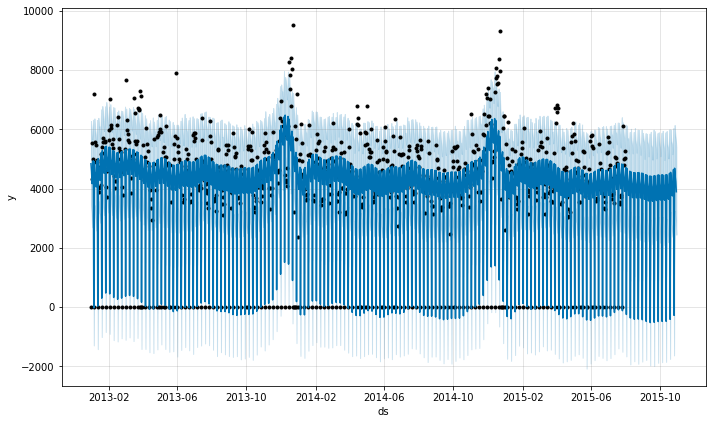

In [ ]:
model.plot(forecast);

In [ ]:
test2 = df.groupby(['Assortment', 'Date']).sum()[['Sales']].reset_index()
test2

Assortment       Date    Sales
0             a 2013-01-01    40019
1             a 2013-01-02  3631876
2             a 2013-01-03  3302303
3             a 2013-01-04  3438781
4             a 2013-01-05  2952820
...         ...        ...      ...
2821          c 2015-07-27  5268603
2822          c 2015-07-28  4426766
2823          c 2015-07-29  4202302
2824          c 2015-07-30  4354407
2825          c 2015-07-31  5049702

[2826 rows x 3 columns]

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


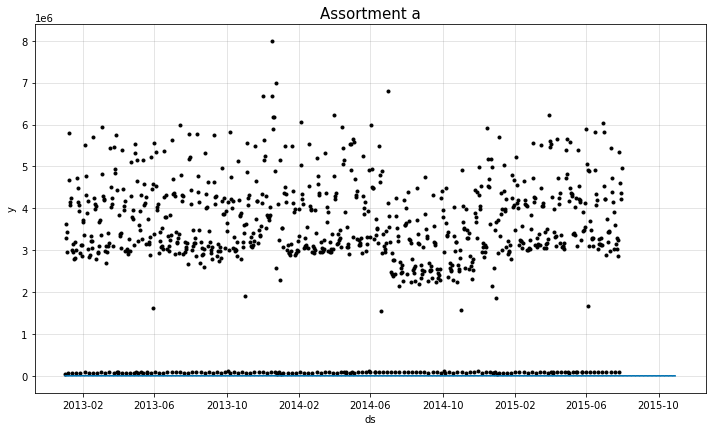

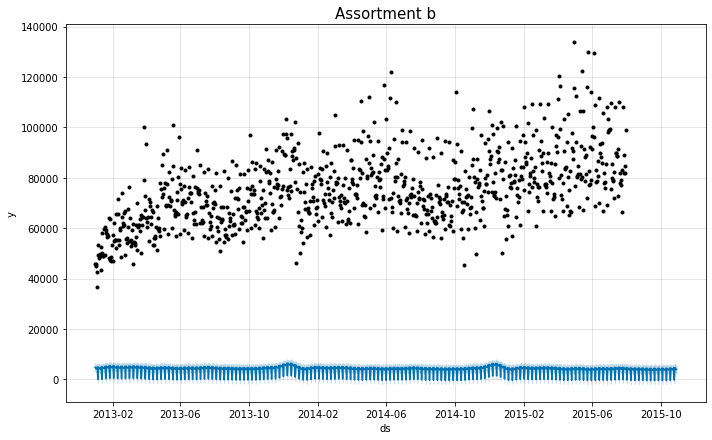

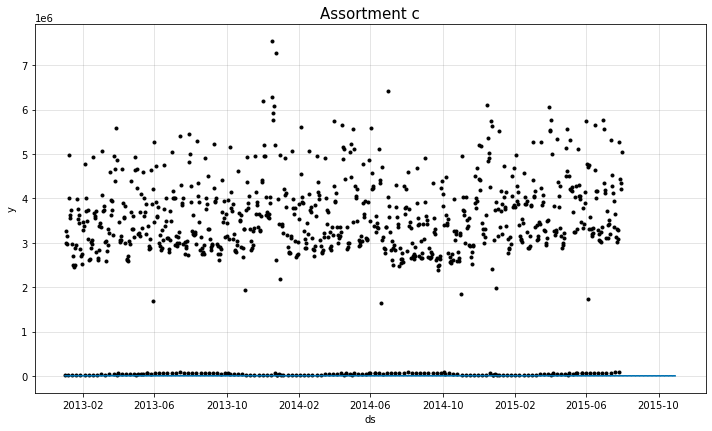

In [ ]:
for i in test2['Assortment'].unique().tolist():
    # for distinct values in column, create dataframes
    df_ = test2[test2['Assortment'] == i]
    df_ = df_.groupby('Date').sum()[['Sales']].reset_index()
    df_ = df_.rename(mapper = {'Date':'ds', 'Sales':'y'}, axis = 1)

    model_ = Prophet()
    model_.fit(df_)

    future_ = model_.make_future_dataframe(periods = 90)
    preds_ = model_.predict(future)
    fig_ = model_.plot(forecast)
    ax_ = fig_.gca()
    ax_.set_title(f'Assortment {i}', size=15)

In [ ]:
for i in test2['Assortment'].unique().tolist():
    # for distinct values in column, create dataframes
    df_ = test2[test2['Assortment'] == i]
    df_ = df_.rename(mapper = {'Date':'ds', 'Sales':'y'}, axis = 1)

    model_ = Prophet()
    model_.fit(df_)

    future_ = model_.make_future_dataframe(periods = 90)
    preds_ = model_.predict(future)
    fig_ = model_.plot(forecast)
    ax_ = fig_.gca()
    ax_.set_title(f'Assortment {i}', size=34)

In [ ]:
def future_sales(sales_of = 'Assortment', periods = 90):
    # get unique values of column to slice one by one
    for i in df[sales_of].unique().tolist():
        df_ = df[df[sales_of] == i]
        
        

In [ ]:
test3 = df[df['Assortment'] == 'a'].groupby('Date').sum()[['Sales']].reset_index()
test3 = test3.rename(columns = {'Date':'ds', 'Sales':'y'})
test3

ds        y
0   2013-01-01    40019
1   2013-01-02  3631876
2   2013-01-03  3302303
3   2013-01-04  3438781
4   2013-01-05  2952820
..         ...      ...
937 2015-07-27  5349519
938 2015-07-28  4606365
939 2015-07-29  4215536
940 2015-07-30  4359860
941 2015-07-31  4961174

[942 rows x 2 columns]

In [ ]:
model_test = Prophet()
model_test.fit(test3)
future = model_test.make_future_dataframe(periods = 90)
preds = model_test.predict(future)

preds

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds         trend  ...  multiplicative_terms_upper          yhat
0    2013-01-01  3.167542e+06  ...                         0.0  3.603879e+06
1    2013-01-02  3.167690e+06  ...                         0.0  3.320196e+06
2    2013-01-03  3.167837e+06  ...                         0.0  3.131106e+06
3    2013-01-04  3.167985e+06  ...                         0.0  3.373741e+06
4    2013-01-05  3.168133e+06  ...                         0.0  2.770230e+06
...         ...           ...  ...                         ...           ...
1027 2015-10-25  3.376249e+06  ...                         0.0  1.536292e+05
1028 2015-10-26  3.377497e+06  ...                         0.0  4.372614e+06
1029 2015-10-27  3.378745e+06  ...                         0.0  3.953444e+06
1030 2015-10-28  3.379992e+06  ...                         0.0  3.688331e+06
1031 2015-10-29  3.381240e+06  ...                         0.0  3.509452e+06

[1032 rows x 19 columns]

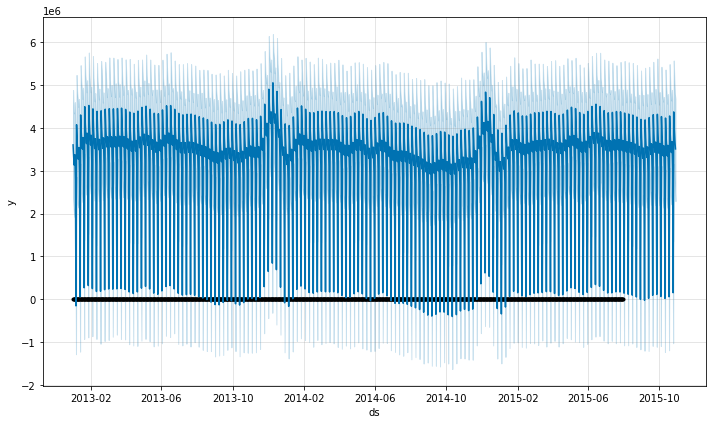

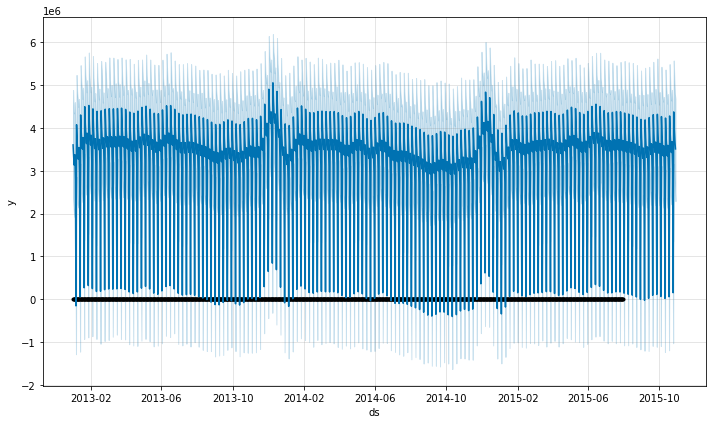

In [ ]:
model.plot(preds)